# Importing the libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from sklearn.linear_model import LinearRegression, RidgeCV, LassoCV, ElasticNetCV
from sklearn.model_selection import cross_val_score,train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error,make_scorer

In [3]:
from sklearn.ensemble import RandomForestRegressor

In [4]:
from scipy.stats import skew

In [5]:
from fancyimpute import MICE

C:\Users\Pradeep\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [6]:
from sklearn.preprocessing import OneHotEncoder,LabelEncoder

In [7]:
%matplotlib inline
sns.set_style('whitegrid')
sns.color_palette('viridis')

[(0.275191, 0.194905, 0.496005),
 (0.212395, 0.359683, 0.55171),
 (0.153364, 0.497, 0.557724),
 (0.122312, 0.633153, 0.530398),
 (0.288921, 0.758394, 0.428426),
 (0.626579, 0.854645, 0.223353)]

# Import the dataset

In [8]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

# Exploratory Data Analysis

In [9]:
train.shape

(1460, 81)

In [10]:
test.shape

(1459, 80)

In [11]:
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [12]:
test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [13]:
train.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [14]:
len(set(train['Id'])),len(set(test['Id']))

(1460, 1459)

(1460,1459) unique values present in (train,test) dataset for ID column. So no duplicate record present.

In [15]:
train['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

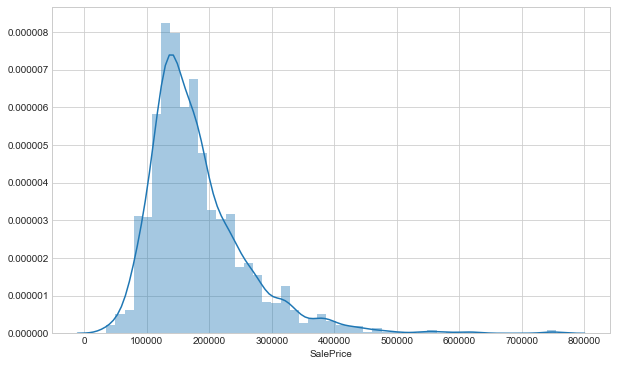

In [16]:
plt.figure(figsize=(10,6))
sns.distplot(train['SalePrice'])

### Sale Price seems to follow Normal Distribution with skewness to the right.

Text(0,0.5,'Sale Price')

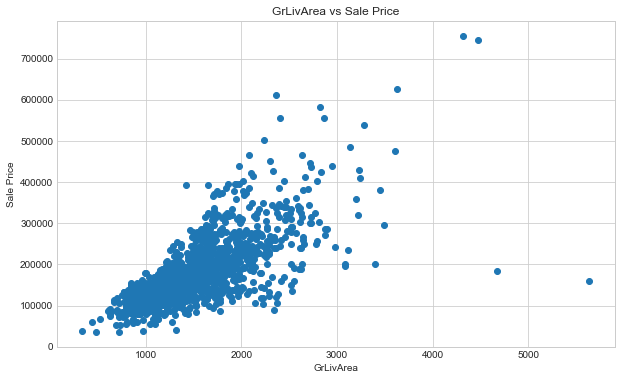

In [17]:
plt.figure(figsize=(10,6))
plt.scatter(train['GrLivArea'],train['SalePrice'])
plt.title('GrLivArea vs Sale Price')
plt.xlabel('GrLivArea')
plt.ylabel('Sale Price')

## There is a positive trend among these two. We can also see two outliers with area greater than 4000 but price quite low. We need to remove those.

In [18]:
train[train['GrLivArea'] > 4000][['LotArea','SaleType','GrLivArea','Condition1','Neighborhood','SaleCondition']]

,LotArea,SaleType,GrLivArea,Condition1,Neighborhood,SaleCondition
523,40094,New,4676,PosN,Edwards,Partial
691,21535,WD,4316,Norm,NoRidge,Normal
1182,15623,WD,4476,Norm,NoRidge,Abnorml
1298,63887,New,5642,Feedr,Edwards,Partial


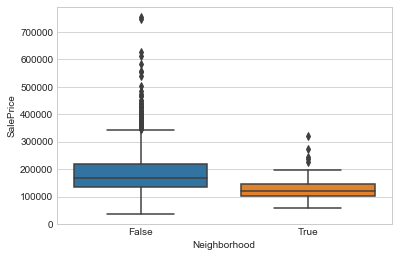

In [19]:
sns.boxplot(train['Neighborhood']=='Edwards',train['SalePrice'])

## These areas below to Edwards which has low median Sale Price compared to other areas.
## So, it seem like neighbourhood has quite a bit impact on Sale Price.

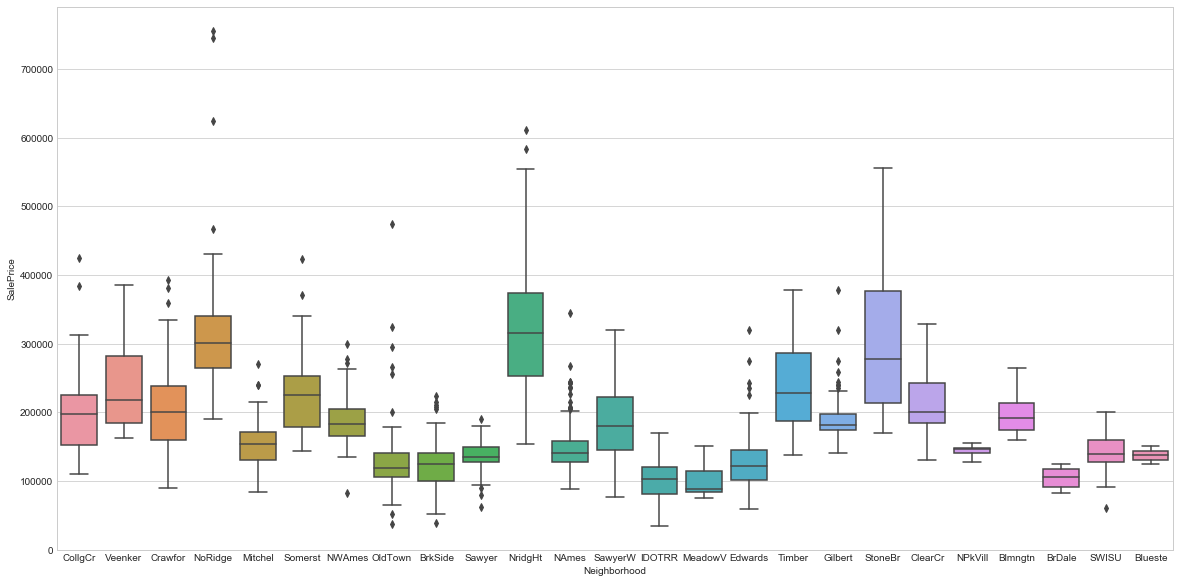

In [20]:
plt.figure(figsize=(20,10))
sns.boxplot(train['Neighborhood'],train['SalePrice'])

## There is quite a bit variance here based on neighbourhood type. So neighbourhood has effect on Sale Price of a house

## Now let's look at Sale Condition, whether it has impact on Sale Price

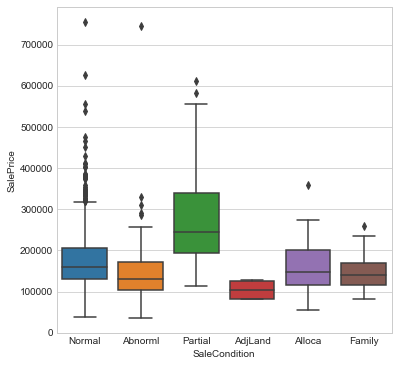

In [21]:
plt.figure(figsize=(6,6))
sns.boxplot(train['SaleCondition'],train['SalePrice'])

### Partial Sales have the most median Sale Price but it does not seem to show significant impact.

In [22]:
train.groupby('SaleCondition')['SalePrice'].describe()

,count,mean,std,min,25%,50%,75%,max
SaleCondition,,,,,,,,
Abnorml,101.0,146526.623762,82796.213395,34900.0,104000.00,130000.0,172500.0,745000.0
AdjLand,4.0,104125.000000,26135.464411,81000.0,81750.00,104000.0,126375.0,127500.0
Alloca,12.0,167377.416667,84460.527502,55993.0,116383.25,148145.0,202043.0,359100.0
Family,20.0,149600.000000,47820.002421,82500.0,115500.00,140500.0,170250.0,259000.0
Normal,1198.0,175202.219533,69713.636280,39300.0,130000.00,160000.0,205000.0,755000.0
Partial,125.0,272291.752000,103696.404119,113000.0,193879.00,244600.0,339750.0,611657.0


# Data Preprocessing

In [23]:
train_backup = train
test_backup = test

In [24]:
all_data = pd.concat((train.loc[:,:'SaleCondition'],test.loc[:,:'SaleCondition']))

In [25]:
all_data.reset_index(inplace=True)
all_data.drop('index',inplace=True,axis=1)

In [26]:
all_data.tail()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
2914,2915,160,RM,21.0,1936,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2006,WD,Normal
2915,2916,160,RM,21.0,1894,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,4,2006,WD,Abnorml
2916,2917,20,RL,160.0,20000,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,9,2006,WD,Abnorml
2917,2918,85,RL,62.0,10441,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,MnPrv,Shed,700,7,2006,WD,Normal
2918,2919,60,RL,74.0,9627,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,11,2006,WD,Normal


In [27]:
train['SalePrice'] = np.log1p(train['SalePrice'])

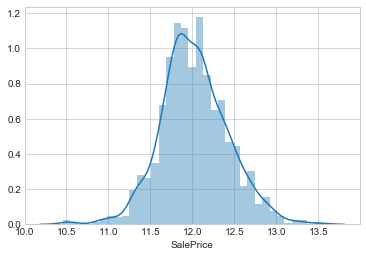

In [28]:
sns.distplot(train['SalePrice'])

### Taking log to reduce skewness

## Let's look at missing values

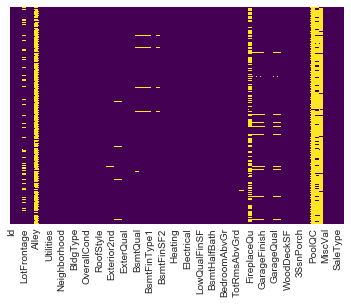

In [30]:
sns.heatmap(all_data.isnull(),cmap='viridis',yticklabels=False,cbar=False)

## Lots of missing values in Alley, PoolQC and FireplaceQU columns

In [31]:
all_data.isnull().sum().sort_values(ascending=False)

PoolQC           2909
MiscFeature      2814
Alley            2721
Fence            2348
FireplaceQu      1420
LotFrontage       486
GarageCond        159
GarageQual        159
GarageYrBlt       159
GarageFinish      159
GarageType        157
BsmtCond           82
BsmtExposure       82
BsmtQual           81
BsmtFinType2       80
BsmtFinType1       79
MasVnrType         24
MasVnrArea         23
MSZoning            4
BsmtHalfBath        2
Utilities           2
Functional          2
BsmtFullBath        2
BsmtFinSF1          1
Exterior1st         1
Exterior2nd         1
BsmtFinSF2          1
BsmtUnfSF           1
TotalBsmtSF         1
SaleType            1
                 ... 
YearBuilt           0
OverallCond         0
SaleCondition       0
Heating             0
ExterQual           0
ExterCond           0
YrSold              0
MoSold              0
MiscVal             0
PoolArea            0
ScreenPorch         0
3SsnPorch           0
EnclosedPorch       0
OpenPorchSF         0
WoodDeckSF

In [32]:
#NA means No Pool
all_data['PoolQC'] = all_data['PoolQC'].fillna('No')

#NA means none
all_data['MiscFeature'] = all_data['MiscFeature'].fillna('None')

#NA means No alley
all_data['Alley'] = all_data['Alley'].fillna('No')

#NA means no fence
all_data['Fence'] = all_data['Fence'].fillna('No')

#NA means no fireplace
all_data['FireplaceQu'] = all_data['FireplaceQu'].fillna('No')

#NA means no garage
all_data['GarageCond'] = all_data['GarageCond'].fillna('None')
all_data['GarageArea'] = all_data['GarageArea'].fillna(0)
all_data['GarageCars'] = all_data['GarageCars'].fillna(0)
all_data['GarageFinish'] = all_data['GarageFinish'].fillna('No')
all_data['GarageQual'] = all_data['GarageQual'].fillna('No')
all_data['GarageType'] = all_data['GarageType'].fillna('No')

#NA means no basement
all_data['BsmtCond'] = all_data['BsmtCond'].fillna('No')
all_data['BsmtExposure'] = all_data['BsmtExposure'].fillna('No')
all_data['BsmtFinType1'] = all_data['BsmtFinType1'].fillna('No')
all_data['BsmtFinType2'] = all_data['BsmtFinType2'].fillna('No')
all_data['BsmtFullBath'] = all_data['BsmtFullBath'].fillna(0)
all_data['BsmtHalfBath'] = all_data['BsmtHalfBath'].fillna(0)
all_data['BsmtQual'] = all_data['BsmtQual'].fillna('No')
all_data['BsmtUnfSF'] = all_data['BsmtUnfSF'].fillna(0)

#Masvnr Type- NA means None
all_data['MasVnrType'] = all_data['MasVnrType'].fillna('No')
all_data['MasVnrArea'] = all_data['MasVnrArea'].fillna(0)

#Filling rest values
all_data['Utilities'] = all_data['Utilities'].fillna('AllPub')
all_data['Functional'] = all_data['Functional'].fillna('Typ')
all_data['KitchenQual'] = all_data['KitchenQual'].fillna('TA')
all_data['MSZoning'] = all_data['MSZoning'].fillna('RL')
all_data['Electrical'] = all_data['Electrical'].fillna('SBrkr')
all_data['GarageYrBlt'] = all_data['GarageYrBlt'].fillna(0)
all_data['BsmtFinSF1'] = all_data['BsmtFinSF1'].fillna(all_data['BsmtFinSF1'].median())
all_data['BsmtFinSF2'] = all_data['BsmtFinSF2'].fillna(all_data['BsmtFinSF2'].median())
all_data['TotalBsmtSF'] = all_data['TotalBsmtSF'].fillna(all_data['TotalBsmtSF'].median())

all_data['SaleType'] = all_data['SaleType'].fillna('WD')
all_data['Exterior1st'] = all_data['Exterior1st'].fillna('VinylSd')
all_data['Exterior2nd'] = all_data['Exterior2nd'].fillna('VinylSd')

## Fill up missing values for lot frontage and using MICE to fill it up

In [33]:
lot = all_data[['LotFrontage','LotArea']]

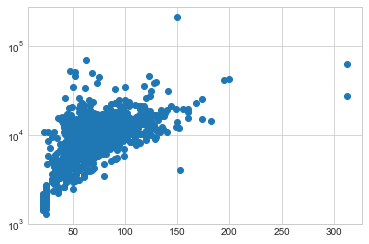

In [34]:
plt.scatter(all_data['LotFrontage'],all_data['LotArea'])
plt.yscale('log')

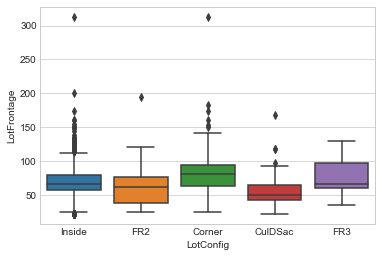

In [35]:
sns.boxplot(all_data['LotConfig'],all_data['LotFrontage'])

In [36]:
all_data.groupby('LotConfig').agg({'LotFrontage':np.mean,'LotArea':np.average})

,LotFrontage,LotArea
LotConfig,,
Corner,82.690418,10843.315068
CulDSac,56.775281,15638.221591
FR2,61.276923,10595.976471
FR3,79.300000,10498.857143
Inside,67.205693,9535.781528


In [37]:
lot_comp = MICE().complete(np.array(lot))

[MICE] Completing matrix with shape (2919, 2)
[MICE] Starting imputation round 1/110, elapsed time 0.016
[MICE] Starting imputation round 2/110, elapsed time 0.946
[MICE] Starting imputation round 3/110, elapsed time 0.946
[MICE] Starting imputation round 4/110, elapsed time 0.946
[MICE] Starting imputation round 5/110, elapsed time 0.946
[MICE] Starting imputation round 6/110, elapsed time 0.946
[MICE] Starting imputation round 7/110, elapsed time 0.946
[MICE] Starting imputation round 8/110, elapsed time 0.946
[MICE] Starting imputation round 9/110, elapsed time 0.946
[MICE] Starting imputation round 10/110, elapsed time 0.946
[MICE] Starting imputation round 11/110, elapsed time 0.946
[MICE] Starting imputation round 12/110, elapsed time 0.946
[MICE] Starting imputation round 13/110, elapsed time 0.946
[MICE] Starting imputation round 14/110, elapsed time 0.946
[MICE] Starting imputation round 15/110, elapsed time 0.946
[MICE] Starting imputation round 16/110, elapsed time 0.946
[MI

In [38]:
lot_comp = pd.DataFrame(lot_comp,columns=lot.columns)

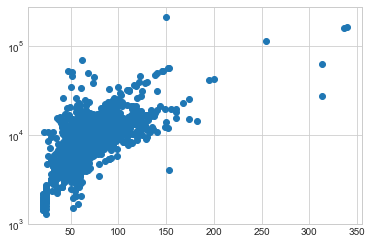

In [39]:
plt.scatter(lot_comp['LotFrontage'],lot_comp['LotArea'])
plt.yscale('log')

(array([171., 316., 932., 968., 345.,  99.,  49.,  16.,  12.,   3.,   2.,
          1.,   0.,   0.,   1.,   0.,   0.,   0.,   2.,   2.]),
 array([ 21.        ,  36.93365141,  52.86730283,  68.80095424,
         84.73460565, 100.66825707, 116.60190848, 132.53555989,
        148.46921131, 164.40286272, 180.33651413, 196.27016555,
        212.20381696, 228.13746837, 244.07111979, 260.0047712 ,
        275.93842261, 291.87207403, 307.80572544, 323.73937685,
        339.67302827]),
 <a list of 20 Patch objects>)

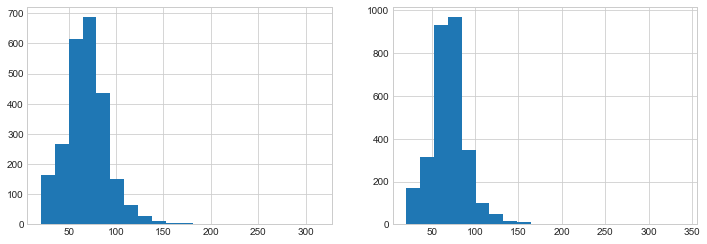

In [40]:
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

axes[0].hist(lot['LotFrontage'].dropna(),bins=20)

axes[1].hist(lot_comp['LotFrontage'],bins=20)

In [41]:
lot_comp['LotFrontage'] = round(lot_comp['LotFrontage'])

In [42]:
#Imputed Lot Frontage using MICE imputation
all_data['LotFrontage'] = lot_comp['LotFrontage']

### Numerical features Mosold and MSSub class are categories

In [43]:
all_data.tail()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
2914,2915,160,RM,21.0,1936,Pave,No,Reg,Lvl,AllPub,...,0,0,No,No,None,0,6,2006,WD,Normal
2915,2916,160,RM,21.0,1894,Pave,No,Reg,Lvl,AllPub,...,0,0,No,No,None,0,4,2006,WD,Abnorml
2916,2917,20,RL,160.0,20000,Pave,No,Reg,Lvl,AllPub,...,0,0,No,No,None,0,9,2006,WD,Abnorml
2917,2918,85,RL,62.0,10441,Pave,No,Reg,Lvl,AllPub,...,0,0,No,MnPrv,Shed,700,7,2006,WD,Normal
2918,2919,60,RL,74.0,9627,Pave,No,Reg,Lvl,AllPub,...,0,0,No,No,None,0,11,2006,WD,Normal


In [44]:
all_data = all_data.replace({'MSSubClass':{20 : "SC20", 30 : "SC30", 40 : "SC40", 45 : "SC45", 
                                       50 : "SC50", 60 : "SC60", 70 : "SC70", 75 : "SC75", 
                                       80 : "SC80", 85 : "SC85", 90 : "SC90", 120 : "SC120", 
                                       150 : "SC150", 160 : "SC160", 180 : "SC180", 190 : "SC190"}})

In [45]:
all_data = all_data.replace({'MoSold':{1 : "Jan", 2 : "Feb", 3 : "Mar", 4 : "Apr", 5 : "May", 6 : "Jun",
                                   7 : "Jul", 8 : "Aug", 9 : "Sep", 10 : "Oct", 11 : "Nov", 12 : "Dec"}})

## Log transforming for features that are skewed heavily

In [46]:
numerical_features = all_data.select_dtypes(exclude=["object"]).columns

In [47]:
categorical_features = all_data.select_dtypes(include=["object"]).columns

In [48]:
skewness = all_data[numerical_features].apply(lambda x:skew(x))
skewness = skewness[abs(skewness)>0.5]
skewed_features = skewness.index

all_data[skewed_features] = np.log1p(all_data[skewed_features])

## Generating dummy variables for categorical features

In [49]:
categorical_features

Index(['MSSubClass', 'MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour',
       'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1',
       'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl',
       'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond',
       'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1',
       'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical',
       'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType',
       'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC',
       'Fence', 'MiscFeature', 'MoSold', 'SaleType', 'SaleCondition'],
      dtype='object')

In [50]:
ordinal_categorical_features = ['ExterQual','ExterCond','BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1',
                               'BsmtFinType2','HeatingQC','KitchenQual','FireplaceQu','GarageQual','GarageCond','PoolQC']

In [51]:
nominal_categorical_features = categorical_features.drop(ordinal_categorical_features)

In [52]:
label_encoder = LabelEncoder()

In [53]:
all_data[ordinal_categorical_features] = all_data[ordinal_categorical_features].apply(LabelEncoder().fit_transform)

In [54]:
#all_data['ExterQual'] = label_encoder.fit_transform(all_data['ExterQual'])
#all_data['ExterCond'] = label_encoder.fit_transform(all_data['ExterCond'])
#all_data['BsmtQual'] = label_encoder.fit_transform(all_data['BsmtQual'])
#all_data['BsmtCond'] = label_encoder.fit_transform(all_data['BsmtCond'])
#all_data['BsmtExposure'] = label_encoder.fit_transform(all_data['BsmtExposure'])
#all_data['BsmtFinType1'] = label_encoder.fit_transform(all_data['BsmtFinType1'])
#all_data['BsmtFinType2'] = label_encoder.fit_transform(all_data['BsmtFinType2'])
#all_data['HeatingQC'] = label_encoder.fit_transform(all_data['HeatingQC'])
#all_data['KitchenQual'] = label_encoder.fit_transform(all_data['KitchenQual'])
#all_data['FireplaceQu'] = label_encoder.fit_transform(all_data['FireplaceQu'])
#all_data['GarageQual'] = label_encoder.fit_transform(all_data['GarageQual'])
#all_data['GarageCond'] = label_encoder.fit_transform(all_data['GarageCond'])
#all_data['PoolQC'] = label_encoder.fit_transform(all_data['PoolQC'])

In [55]:
all_data['BsmtQual'].describe()

count    2919.000000
mean        2.699897
std         1.296263
min         0.000000
25%         2.000000
50%         2.000000
75%         4.000000
max         4.000000
Name: BsmtQual, dtype: float64

In [56]:
all_data[nominal_categorical_features]

,MSSubClass,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,...,Electrical,Functional,GarageType,GarageFinish,PavedDrive,Fence,MiscFeature,MoSold,SaleType,SaleCondition
0,SC60,RL,Pave,No,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,...,SBrkr,Typ,Attchd,RFn,Y,No,None,Feb,WD,Normal
1,SC20,RL,Pave,No,Reg,Lvl,AllPub,FR2,Gtl,Veenker,...,SBrkr,Typ,Attchd,RFn,Y,No,None,May,WD,Normal
2,SC60,RL,Pave,No,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,...,SBrkr,Typ,Attchd,RFn,Y,No,None,Sep,WD,Normal
3,SC70,RL,Pave,No,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,...,SBrkr,Typ,Detchd,Unf,Y,No,None,Feb,WD,Abnorml
4,SC60,RL,Pave,No,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,...,SBrkr,Typ,Attchd,RFn,Y,No,None,Dec,WD,Normal
5,SC50,RL,Pave,No,IR1,Lvl,AllPub,Inside,Gtl,Mitchel,...,SBrkr,Typ,Attchd,Unf,Y,MnPrv,Shed,Oct,WD,Normal
6,SC20,RL,Pave,No,Reg,Lvl,AllPub,Inside,Gtl,Somerst,...,SBrkr,Typ,Attchd,RFn,Y,No,None,Aug,WD,Normal
7,SC60,RL,Pave,No,IR1,Lvl,AllPub,Corner,Gtl,NWAmes,...,SBrkr,Typ,Attchd,RFn,Y,No,Shed,Nov,WD,Normal
8,SC50,RM,Pave,No,Reg,Lvl,AllPub,Inside,Gtl,OldTown,...,FuseF,Min1,Detchd,Unf,Y,No,None,Apr,WD,Abnorml
9,SC190,RL,Pave,No,Reg,Lvl,AllPub,Corner,Gtl,BrkSide,...,SBrkr,Typ,Attchd,RFn,Y,No,None,Jan,WD,Normal


In [57]:
all_data_cat = pd.get_dummies(all_data[nominal_categorical_features],drop_first=True)

In [58]:
all_data.drop(nominal_categorical_features,axis=1,inplace=True)

In [59]:
all_data = pd.concat([all_data,all_data_cat],axis=1)

In [60]:
all_data.tail()

,Id,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,ExterQual,ExterCond,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
2914,2915,3.091042,7.568896,4,2.079442,7.586296,1970,0.000000,3,4,...,0,0,0,0,1,0,0,0,1,0
2915,2916,3.091042,7.546974,4,1.791759,7.586296,1970,0.000000,3,4,...,0,0,0,0,1,0,0,0,0,0
2916,2917,5.081404,9.903538,5,2.079442,7.581210,1996,0.000000,3,4,...,0,0,0,0,1,0,0,0,0,0
2917,2918,4.143135,9.253591,5,1.791759,7.597396,1992,0.000000,3,4,...,0,0,0,0,1,0,0,0,1,0
2918,2919,4.317488,9.172431,7,1.791759,7.597898,1994,4.553877,3,4,...,0,0,0,0,1,0,0,0,1,0


## Splitting back into training set and test set

In [61]:
X_train = all_data[:1460]

In [62]:
y_train = train['SalePrice'].values

In [63]:
#y_train = y_train.reshape(-1,1)

In [64]:
X_test = all_data[1460:]

In [65]:
X_train.shape,X_test.shape

((1460, 242), (1459, 242))

## Feature Scaling

In [66]:
sc_X = StandardScaler()

In [67]:
X_train = sc_X.fit_transform(X_train)

In [68]:
X_test = sc_X.transform(X_test)

## Linear Regression

In [69]:
regressor = LinearRegression()

In [70]:
regressor.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [71]:
scorer = make_scorer(mean_squared_error,greater_is_better=False)
rmse = np.sqrt(-cross_val_score(regressor,X_train,y_train,scoring=scorer,cv=10))

In [72]:
rmse = rmse.mean()

In [73]:
rmse

100344547310.29294

In [74]:
y_train_pred = regressor.predict(X_train)

In [75]:
y_pred = regressor.predict(X_test)

## Plot Residuals

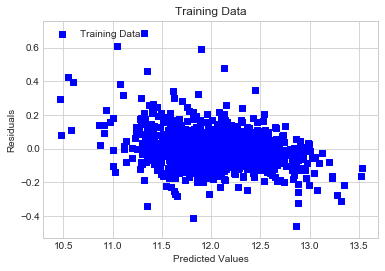

In [76]:
plt.scatter(y_train,y_train_pred - y_train,c='blue',marker='s',label = 'Training Data')
plt.title('Training Data')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.legend(loc = 'upper left')

In [77]:
y_pred = y_pred.ravel()

In [83]:
y_pred = np.expm1(y_pred)

C:\Users\Pradeep\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: RuntimeWarning: overflow encountered in expm1
  """Entry point for launching an IPython kernel.


In [109]:
linear_result = pd.DataFrame(test['Id'])

In [111]:
linear_result['SalePrice'] = y_pred

In [112]:
linear_result.set_index('Id',inplace=True)

In [113]:
linear_result.to_csv('LinearModelResults.csv')

# Random Forest

In [134]:
rf_regressor = RandomForestRegressor(n_estimators=1500,random_state=0)

In [135]:
rf_regressor.fit(X_train,y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=1500, n_jobs=1,
           oob_score=False, random_state=0, verbose=0, warm_start=False)

In [136]:
y_pred_rf = rf_regressor.predict(X_test)

In [137]:
y_train_pred_rf = rf_regressor.predict(X_train)

In [138]:
rmse_rf = np.sqrt(-cross_val_score(rf_regressor,X_train,y_train,scoring=scorer,cv=10))

In [139]:
rmse_rf.mean()

0.1414445270668397

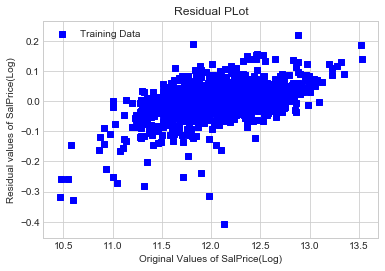

In [140]:
plt.scatter(y_train,y_train-y_train_pred_rf,c='blue',marker='s',label = 'Training Data')
plt.xlabel('Original Values of SalPrice(Log)')
plt.ylabel('Residual values of SalPrice(Log)')
plt.title('Residual PLot')
plt.legend(loc = 'upper left')

In [141]:
y_pred_rf = np.expm1(y_pred_rf)

In [142]:
rf_result = pd.DataFrame(test['Id'])

In [143]:
rf_result['SalePrice'] = y_pred_rf

In [144]:
rf_result.set_index('Id',inplace=True)

In [145]:
rf_result.to_csv('Random Forest Result.csv')

# Ridge CV

In [183]:
ridge = RidgeCV(alphas=[0.01,0.03,0.1,0.3,1,3,9,30,60,100,300,600])

In [184]:
ridge.fit(X_train,y_train)

RidgeCV(alphas=[0.01, 0.03, 0.1, 0.3, 1, 3, 9, 30, 60, 100, 300, 600],
    cv=None, fit_intercept=True, gcv_mode=None, normalize=False,
    scoring=None, store_cv_values=False)

In [187]:
alpha = ridge.alpha_

In [188]:
#Finding a alpha cebtered around 600
ridge = RidgeCV(alphas = [alpha * .6, alpha * .65, alpha * .7, alpha * .75, alpha * .8, alpha * .85, 
                          alpha * .9, alpha * .95, alpha, alpha * 1.05, alpha * 1.1, alpha * 1.15,
                          alpha * 1.25, alpha * 1.3, alpha * 1.35, alpha * 1.4], 
                cv = 10)

In [189]:
ridge.fit(X_train,y_train)

RidgeCV(alphas=[180.0, 195.0, 210.0, 225.0, 240.0, 255.0, 270.0, 285.0, 300.0, 315.0, 330.0, 345.0, 375.0, 390.0, 405.0, 420.0],
    cv=10, fit_intercept=True, gcv_mode=None, normalize=False,
    scoring=None, store_cv_values=False)

In [190]:
alpha = ridge.alpha_

In [192]:
rmse_ridge = np.sqrt(-cross_val_score(ridge,X_train,y_train,scoring=scorer,cv=10))

In [193]:
rmse_ridge.mean()

0.13116983897088266

In [194]:
y_pred_ridge = ridge.predict(X_test)
y_train_pred_ridge = ridge.predict(X_train)

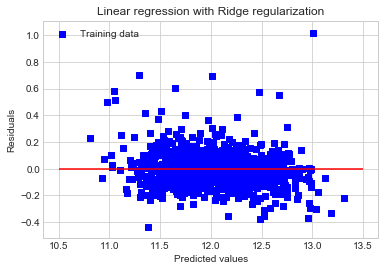

In [195]:
plt.scatter(y_train_pred_ridge, y_train_pred_ridge - y_train, c = "blue", marker = "s", label = "Training data")
plt.title("Linear regression with Ridge regularization")
plt.xlabel("Predicted values")
plt.ylabel("Residuals")
plt.legend(loc = "upper left")
plt.hlines(y = 0, xmin = 10.5, xmax = 13.5, color = "red")

In [196]:
y_pred_ridge = np.expm1(y_pred_ridge)

In [197]:
ridge_result = pd.DataFrame(test['Id'])
ridge_result['SalePrice'] = y_pred_ridge

In [199]:
ridge_result.set_index('Id',inplace=True)

In [200]:
ridge_result.to_csv('Ridge Results.csv')

# Lasso CV

In [201]:
lasso = LassoCV(alphas=[0.0001,0.0003,0.001,0.003,0.01,0.03,0.1,0.3,1])

In [202]:
lasso.fit(X_train,y_train)

C:\Users\Pradeep\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


LassoCV(alphas=[0.0001, 0.0003, 0.001, 0.003, 0.01, 0.03, 0.1, 0.3, 1],
    copy_X=True, cv=None, eps=0.001, fit_intercept=True, max_iter=1000,
    n_alphas=100, n_jobs=1, normalize=False, positive=False,
    precompute='auto', random_state=None, selection='cyclic', tol=0.0001,
    verbose=False)

In [203]:
alpha = lasso.alpha_

In [205]:
lasso = LassoCV(alphas=[alpha * .6, alpha * .65, alpha * .7, alpha * .75, alpha * .8, 
                          alpha * .85, alpha * .9, alpha * .95, alpha, alpha * 1.05, 
                          alpha * 1.1, alpha * 1.15, alpha * 1.25, alpha * 1.3, alpha * 1.35, 
                          alpha * 1.4], 
                max_iter = 50000, cv = 10)

In [206]:
lasso.fit(X_train,y_train)

LassoCV(alphas=[0.0018, 0.0019500000000000001, 0.0021, 0.0022500000000000003, 0.0024000000000000002, 0.00255, 0.0027, 0.00285, 0.003, 0.00315, 0.0033000000000000004, 0.00345, 0.00375, 0.0039000000000000003, 0.004050000000000001, 0.0042],
    copy_X=True, cv=10, eps=0.001, fit_intercept=True, max_iter=50000,
    n_alphas=100, n_jobs=1, normalize=False, positive=False,
    precompute='auto', random_state=None, selection='cyclic', tol=0.0001,
    verbose=False)

In [207]:
alpha = lasso.alpha_

In [210]:
rmse_lasso = np.sqrt(-cross_val_score(lasso,X_train,y_train,scoring=scorer,cv=10))

In [212]:
rmse_lasso.mean()

0.12678695087942948

In [213]:
y_pred_lasso = lasso.predict(X_test)
y_train_pred_lasso = lasso.predict(X_train)

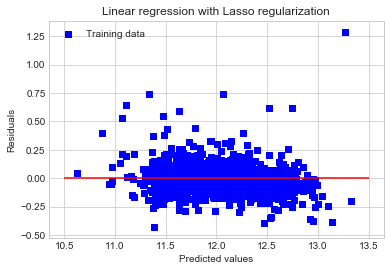

In [214]:
plt.scatter(y_train_pred_lasso, y_train_pred_lasso - y_train, c = "blue", marker = "s", label = "Training data")
plt.title("Linear regression with Lasso regularization")
plt.xlabel("Predicted values")
plt.ylabel("Residuals")
plt.legend(loc = "upper left")
plt.hlines(y = 0, xmin = 10.5, xmax = 13.5, color = "red")
plt.show()

In [215]:
y_pred_lasso = np.expm1(y_pred_lasso)

In [216]:
lasso_result = pd.DataFrame(test['Id'])
lasso_result['SalePrice'] = y_pred_lasso

In [217]:
lasso_result.set_index('Id',inplace=True)

In [218]:
lasso_result.to_csv('Lasso Result.csv')

In [225]:
coef = pd.Series(lasso.coef_,index=all_data.columns)

In [230]:
coef[coef!=0].sort_values(ascending=False)

GrLivArea               0.120104
OverallQual             0.081105
YearBuilt               0.043531
LotArea                 0.040189
OverallCond             0.039578
GarageCars              0.035924
BsmtFinSF1              0.027633
1stFlrSF                0.026022
SaleType_New            0.020437
Neighborhood_NridgHt    0.019416
Neighborhood_Crawfor    0.016410
YearRemodAdd            0.015552
BsmtFullBath            0.015113
Condition1_Norm         0.014656
Neighborhood_StoneBr    0.014627
Fireplaces              0.014582
Functional_Typ          0.014314
Neighborhood_NoRidge    0.013053
SaleCondition_Normal    0.012723
CentralAir_Y            0.012406
TotalBsmtSF             0.011441
Neighborhood_Somerst    0.010721
Exterior1st_BrkFace     0.009825
FullBath                0.008553
ScreenPorch             0.008212
RoofMatl_WdShngl        0.007879
Foundation_PConc        0.007361
WoodDeckSF              0.006700
LotConfig_CulDSac       0.005523
MSSubClass_SC20         0.005091
          